In [2]:
import glob
from PIL import Image
import numpy as np
import cv2

from keyrover.vision import *
from keyrover import RAW_MASKS

(240, 320)


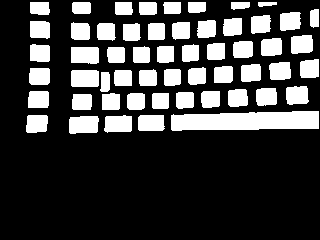

In [3]:
paths = glob.glob(f"{RAW_MASKS}/*.png")

image = Image.open(paths[67]).convert("L").resize((320, 240))
mask = (np.array(image) > 1).astype("uint8")
print(mask.shape)
Image.fromarray(255 * mask)

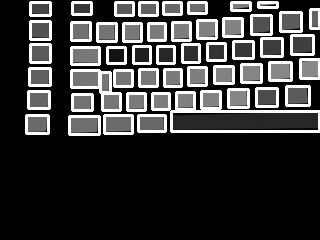

In [3]:
newimg = np.array(image)
for quad in extract_rects(mask):
    x, y, w, h = quad
    cv2.rectangle(newimg, (x, y), (x + w, y + h), (255, 0, 0), 2)

Image.fromarray(newimg)

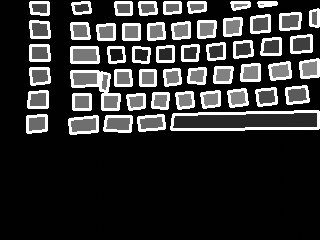

In [4]:
newimg = np.array(image)
for quad in extract_quads(mask):
    cv2.drawContours(newimg, [quad], 0, (255, 0, 0), 2)

Image.fromarray(newimg)

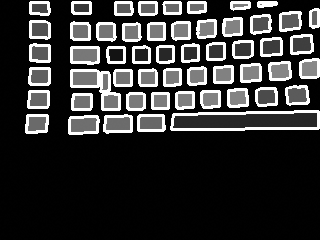

In [5]:
newimg = np.array(image)
for quad in extract_polygons(mask):
    cv2.drawContours(newimg, [quad], 0, (255, 0, 0), 2)

Image.fromarray(newimg)